# Intro to Galaxies

# Intro to Galaxy Zoo

In [191]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rc('font', **{'family':'serif', 'serif':['cmr10']})
plt.rcParams.update({"text.usetex": True,  "axes.formatter.use_mathtext": True}) 

In [116]:
research_data = pd.read_csv('galaxyzoo_research.csv')
agn_data = pd.read_csv('schawinski2010.csv')
peas_data = pd.read_csv('cardamone2009.csv')
gal_data = pd.read_csv('lintott2011.csv')

In [117]:
peas_data['# DR7OBJID'] = peas_data['# DR7OBJID'].astype('int64')
peas_data = peas_data.rename(columns={'# DR7OBJID':'OBJID'})

In [118]:
agn_data['OBJID'] = agn_data['OBJID'].astype('int64')

In [119]:
research_data['OBJID'] = research_data['OBJID'].astype('int64')

In [120]:
gal_data['OBJID'] = gal_data['OBJID'].astype('int64')

In [121]:
research_data['COLOR'] = research_data['GMAG'] - research_data['RMAG']

In [180]:
agn_data.columns

Index(['OBJID', 'RA', 'DEC', 'REDSHIFT', 'GZ1_MORPHOLOGY', 'BPT_CLASS', 'U',
       'G', 'R', 'I', 'Z', 'SIGMA', 'SIGMA_ERR', 'LOG_MSTELLAR', 'L_O3'],
      dtype='object')

In [181]:
agn_data['COLOR'] = agn_data['G'] - agn_data['R']

In [182]:
agn_data['GZ1_MORPHOLOGY']

0        0
1        0
2        0
3        0
4        0
        ..
47670    1
47671    1
47672    0
47673    0
47674    1
Name: GZ1_MORPHOLOGY, Length: 47675, dtype: int64

In [123]:
conditions = [(research_data['P_ELLIPTICAL'] > 0.8), research_data['P_SPIRAL'] > 0.8]
values = ['E', 'S']
research_data['CLASS'] = np.select(conditions, values)

In [125]:
research_data[['OBJID', 'CLASS']]

OBJID CLASS
0      588017991232782464     0
1      587730021726814464     S
2      587724199349584000     0
3      587741489833836672     0
4      587729972323418368     0
...                   ...   ...
19995  587733429237317632     E
19996  588017702958137472     0
19997  587725041704566912     0
19998  587725775606579200     E
19999  588017704001536128     E

[20000 rows x 2 columns]

In [126]:
research_data[['COLOR']].describe()

COLOR
count  20000.000000
mean       0.640526
std        0.154849
min       -1.474424
25%        0.537097
50%        0.681688
75%        0.748759
max        6.918330

In [127]:
research_data[['COLOR']][research_data['CLASS'] == 'E'].describe()

COLOR
count  2509.000000
mean      0.753563
std       0.081901
min       0.302723
25%       0.733410
50%       0.754858
75%       0.775820
max       4.153336

In [128]:
research_data[['COLOR']][research_data['CLASS'] == 'S'].describe()

COLOR
count  6881.000000
mean      0.580715
std       0.134011
min      -0.397812
25%       0.484365
50%       0.574533
75%       0.680891
max       1.204220

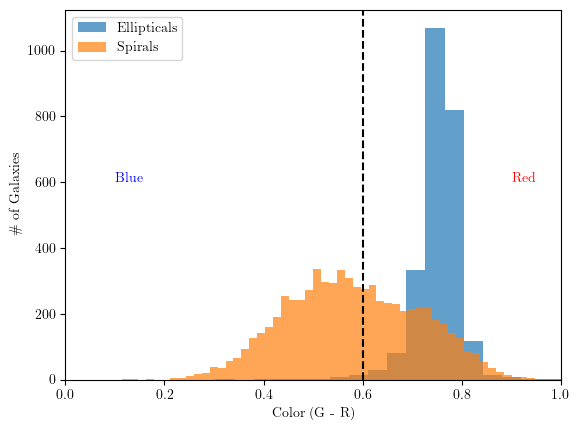

In [170]:
plt.hist(research_data['COLOR'][research_data['CLASS'] == 'E'], bins=100, alpha = 0.7, label='Ellipticals')
plt.hist(research_data['COLOR'][research_data['CLASS'] == 'S'], bins=100, alpha = 0.7, label='Spirals')
plt.axvline(x = 0.6, color='black', linestyle='--')
plt.xlim(0,1)
plt.annotate('Red', (0.9, 600), color='Red')
plt.annotate('Blue', (0.1, 600), color='Blue')
plt.xlabel('Color (G - R)')
plt.ylabel('\# of Galaxies')
plt.legend()
plt.show()

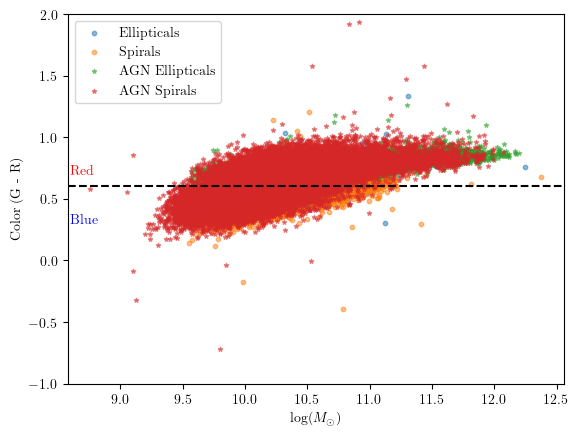

In [190]:
plt.scatter(research_data[research_data['CLASS'] == 'E']['LOG_MASS'], research_data[research_data['CLASS'] == 'E']['COLOR'], alpha=0.5, s=10, label='Ellipticals')
plt.scatter(research_data[research_data['CLASS'] == 'S']['LOG_MASS'], research_data[research_data['CLASS'] == 'S']['COLOR'], alpha=0.5, s=10, label='Spirals')
plt.scatter(agn_data[agn_data['GZ1_MORPHOLOGY'] == 1]['LOG_MSTELLAR'], agn_data[agn_data['GZ1_MORPHOLOGY'] == 1]['COLOR'], alpha=0.5, s=10, marker='*', label='AGN Ellipticals')
plt.scatter(agn_data[agn_data['GZ1_MORPHOLOGY'] == 4]['LOG_MSTELLAR'], agn_data[agn_data['GZ1_MORPHOLOGY'] == 4]['COLOR'], alpha=0.5, s=10, marker='*', label='AGN Spirals')

plt.xlabel('$\log(M_\odot)$')
plt.ylabel('Color (G - R)')
plt.ylim(-1, 2)
plt.axhline(y=0.6, linestyle='--', color='black')
plt.annotate('Red', (8.6, 0.7), color='red')
plt.annotate('Blue', (8.6, 0.3), color='blue')
plt.legend()
plt.show()


In [199]:
galaxies = research_data[research_data['CLASS'] != '0'][['OBJID', 'LOG_MASS', 'COLOR']]

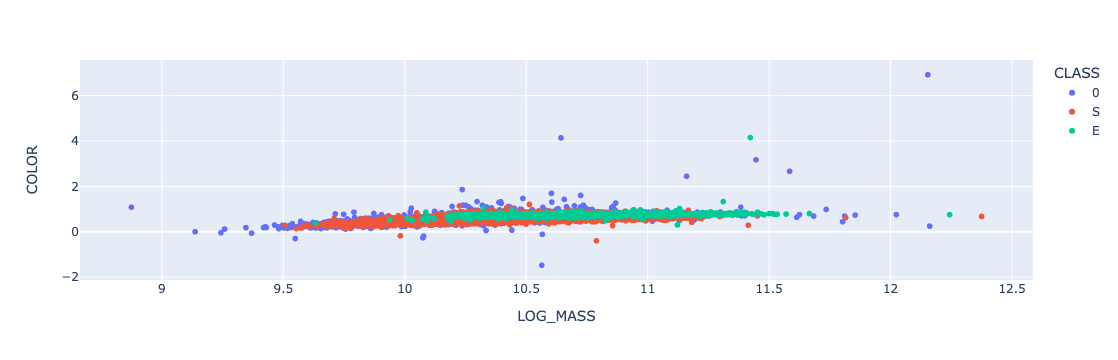

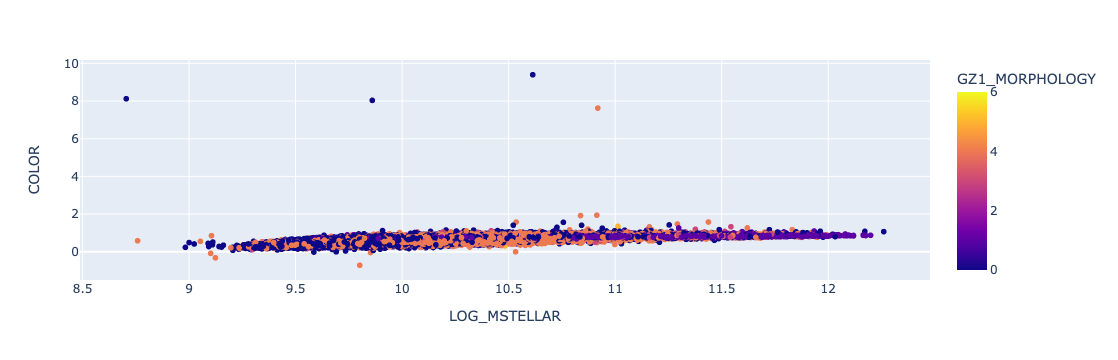

In [198]:
fig = px.scatter(research_data, x='LOG_MASS', y='COLOR', color='CLASS')
fig2 = px.scatter(agn_data, x='LOG_MSTELLAR', y='COLOR', color='GZ1_MORPHOLOGY')
fig.show()
fig2.show()

# Math for Astronomy

# Python for Astronomy